In [1]:
from typing import TypedDict


class SankeyDataDef1(TypedDict):
    """Definition of sankey data."""

    source: list[int]
    target: list[int]
    weights_source: list[float | int] | None
    weights_target: list[float | int] | None


class SankeyDataDef2(TypedDict):
    """Definition of sankey data."""

    source: list[int]
    target: list[int]
    weights: list[float | int]

In [2]:
# data[0]["weights"]
data: list[SankeyDataDef2] = [
    {
        "source": [0, 0, 1, 1, 1],
        "target": [4, 5, 4, 6, 7],
        "weights": [10, 20, 40, 60, 10],
    },
]
data

[{'source': [0, 0, 1, 1, 1],
  'target': [4, 5, 4, 6, 7],
  'weights': [10, 20, 40, 60, 10]}]

In [3]:
import networkx as nx

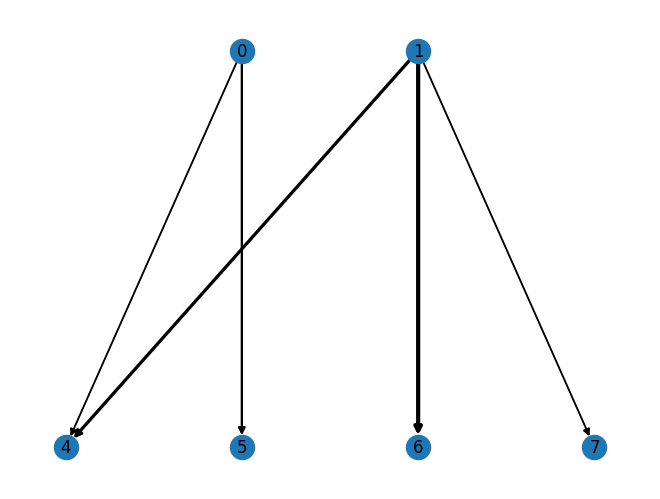

In [4]:
graph = nx.DiGraph()

pos = {}


def _unique_list(l: list) -> list:
    return list(set(l))


for level_index, levels in enumerate(data):
    unique_nodes = list({*levels["source"], *levels["target"]})

    # for node in unique_nodes:
    #     pos[node] = (0, 0)

    x_source_offset = (len(_unique_list(levels["target"])) - len(_unique_list(levels["source"]))) / 2
    x_target_offset = 0

    for source, target, weight in zip(levels["source"], levels["target"], levels["weights"], strict=True):
        graph.add_node(source)
        graph.add_node(target)
        graph.add_edge(
            source,
            target,
            weight=weight,
        )

        if source not in pos:
            pos[source] = (x_source_offset, level_index)
            x_source_offset += 1

        if target not in pos:
            pos[target] = (x_target_offset, level_index - 1)
            x_target_offset += 1


weights = nx.get_edge_attributes(graph, "weight").values()
weights = [w / max(weights) * 2 + 1 for w in weights]

nx.draw(graph, pos, with_labels=True, width=weights)